In [3]:
# PAPATYALAR
# Ökkeş Donbaloğlu - okkesdonbaloglu25@gmail.com
# Muhammed Ali Karsli - muhammedali.karsli1@gmail.com
# Galatasaray Üniversitesi Bilgisayar Mühendisliği 1. Sınıf
# note : to run immediatly ML part (16, 17th block), please run 0 and 4th block

In [1]:
# 0-) Import required moduls and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import math
import os
from unidecode import unidecode # to convert Turkish characters to English

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 


In [2]:
# 1-) Read the sample submission file, we will write the predictions on test.csv in this file at the end

df = pd.read_csv("./sample_submission.csv")
print(df)
# Check if the all users are unique
unique = df["MUSTERI_ID"].unique()
if (len(unique) == len(df["MUSTERI_ID"])):
    print("unique")

                                               MUSTERI_ID  LABEL
0       15b29e51dff893ac19bcbc96c96d1cda0307b4e0edafcd...    NaN
1       7532c2d4751858dd8e7eb3f26c61af568fd3b2a6aa2f32...    NaN
2       47498c1c6161aea484b0eed7997846919ca9287684aee4...    NaN
3       48fe7f96c7e04326f1669b4ae5bdc5ae030da6b8c26498...    NaN
4       26dbe514ebfdb7b664760c07f94d0bf0b297528cd5a358...    NaN
...                                                   ...    ...
195626  a81089c7050cfa5bdb47d519cfc616f66aa28bc5bda0b5...    NaN
195627  fd4362b714e47318627997b801111f34b25c243e6ae550...    NaN
195628  bf0aba86aa8ece82920ce0fea1d1a013d0f80f3761ad47...    NaN
195629  7cf9130d00d3393bb1a1f3b1815eb267c7546e90fc466a...    NaN
195630  08c299b06dbf1f9a5e3695f7234c752a53b87654bf336b...    NaN

[195631 rows x 2 columns]
unique


In [3]:
# 2-) Read the test.csv file to test our model

df_test = pd.read_csv("./test.csv", low_memory=False)
print(df_test.head())
df_test.columns # show the columns (same columns with train.csv file)

                                          MUSTERI_ID   FLAG  PP_CINSIYET  \
0  15b29e51dff893ac19bcbc96c96d1cda0307b4e0edafcd...  KASIM            2   
1  7532c2d4751858dd8e7eb3f26c61af568fd3b2a6aa2f32...  KASIM            1   
2  47498c1c6161aea484b0eed7997846919ca9287684aee4...  KASIM            1   
3  48fe7f96c7e04326f1669b4ae5bdc5ae030da6b8c26498...  KASIM            2   
4  26dbe514ebfdb7b664760c07f94d0bf0b297528cd5a358...  KASIM            1   

   PP_YAS       PP_MESLEK  PP_MUSTERI_SEGMENTI  PP_UYRUK    IL  \
0     467        Öğretmen                  103         1   1.0   
1     658        Öğretmen                  106         1  54.0   
2     634  Serbest Meslek                  106         1  48.0   
3     638             NaN                  106         1  67.0   
4      80         Öğrenci                  106         1  34.0   

  SORU_YATIRIM_KARAKTERI_CVP  SORU_YATIRIM_KARAKTERI_RG  ... HU11  HU12 HU13  \
0                        NaN                        NaN  ...    0 

Index(['MUSTERI_ID', 'FLAG', 'PP_CINSIYET', 'PP_YAS', 'PP_MESLEK',
       'PP_MUSTERI_SEGMENTI', 'PP_UYRUK', 'IL', 'SORU_YATIRIM_KARAKTERI_CVP',
       'SORU_YATIRIM_KARAKTERI_RG', 'SORU_MEDENI_HAL_CVP',
       'SORU_MEDENI_HAL_RG', 'SORU_EGITIM_CVP', 'SORU_EGITIM_RG',
       'SORU_GELIR_CVP', 'SORU_GELIR_RG', 'SORU_COCUK_SAYISI_CVP',
       'SORU_COCUK_SAYISI_RG', 'BES_AYRILMA_TALEP_ADET', 'ODEMEME_TALEP_ADET',
       'HAYAT_AYRILMA_TALEP_ADET', 'BILGI_TALEP_ADET', 'VADE_TUTAR_0',
       'ODEME_TUTAR_0', 'VADE_TUTAR_1', 'ODEME_TUTAR_1', 'VADE_TUTAR_2',
       'ODEME_TUTAR_2', 'VADE_TUTAR_3', 'ODEME_TUTAR_3', 'VADE_TUTAR_4',
       'ODEME_TUTAR_4', 'VADE_TUTAR_5', 'ODEME_TUTAR_5', 'VADE_TUTAR_6',
       'ODEME_TUTAR_6', 'VADE_TUTAR_7', 'ODEME_TUTAR_7', 'VADE_TUTAR_8',
       'ODEME_TUTAR_8', 'VADE_TUTAR_9', 'ODEME_TUTAR_9', 'VADE_TUTAR_10',
       'ODEME_TUTAR_10', 'VADE_TUTAR_11', 'ODEME_TUTAR_11',
       'SON_AY_KATKI_MIKTARI', 'SON_AY_KATKI_ADET', 'SON_CEYREK_KATKI_MIKTARI',
       

In [4]:
# 3-) Read the train.csv file to train a model

df_train = pd.read_csv("./train.csv", low_memory=False)
print(df_train.head())
df_train.columns # show the columns

                                          MUSTERI_ID LABEL     FLAG  \
0  61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34b...    UA  HAZIRAN   
1  8cd400d3897e5ff130e8e942ee1906d17531a8253d26a4...    UA  HAZIRAN   
2  6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad...  HU19  HAZIRAN   
3  fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e...    UA    MAYIS   
4  aae8411e2c335e94922290314abe1fcc81044e8071e1c8...    UA    EYLUL   

   PP_CINSIYET  PP_YAS                                   PP_MESLEK  \
0            2     505                                    Öğretmen   
1            2     889  Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)   
2            2     578                                    Muhasebe   
3            2     648                                       Diğer   
4            2     487                                        İşçi   

   PP_MUSTERI_SEGMENTI  PP_UYRUK  IL SORU_YATIRIM_KARAKTERI_CVP  ...  HU11  \
0                  105         1  34                        NaN  ...     0

Index(['MUSTERI_ID', 'LABEL', 'FLAG', 'PP_CINSIYET', 'PP_YAS', 'PP_MESLEK',
       'PP_MUSTERI_SEGMENTI', 'PP_UYRUK', 'IL', 'SORU_YATIRIM_KARAKTERI_CVP',
       'SORU_YATIRIM_KARAKTERI_RG', 'SORU_MEDENI_HAL_CVP',
       'SORU_MEDENI_HAL_RG', 'SORU_EGITIM_CVP', 'SORU_EGITIM_RG',
       'SORU_GELIR_CVP', 'SORU_GELIR_RG', 'SORU_COCUK_SAYISI_CVP',
       'SORU_COCUK_SAYISI_RG', 'BES_AYRILMA_TALEP_ADET', 'ODEMEME_TALEP_ADET',
       'HAYAT_AYRILMA_TALEP_ADET', 'BILGI_TALEP_ADET', 'VADE_TUTAR_0',
       'ODEME_TUTAR_0', 'VADE_TUTAR_1', 'ODEME_TUTAR_1', 'VADE_TUTAR_2',
       'ODEME_TUTAR_2', 'VADE_TUTAR_3', 'ODEME_TUTAR_3', 'VADE_TUTAR_4',
       'ODEME_TUTAR_4', 'VADE_TUTAR_5', 'ODEME_TUTAR_5', 'VADE_TUTAR_6',
       'ODEME_TUTAR_6', 'VADE_TUTAR_7', 'ODEME_TUTAR_7', 'VADE_TUTAR_8',
       'ODEME_TUTAR_8', 'VADE_TUTAR_9', 'ODEME_TUTAR_9', 'VADE_TUTAR_10',
       'ODEME_TUTAR_10', 'VADE_TUTAR_11', 'ODEME_TUTAR_11',
       'SON_AY_KATKI_MIKTARI', 'SON_AY_KATKI_ADET', 'SON_CEYREK_KATKI_MIKTARI'

In [3]:
# 4-) Required functions are in this block

# formatting function as millions with x parameters
def millions(x, pos):  # this fucntion transforms yticks into xK format (800.000 --> 800k)
    return f'{x/1000:.0f}K'

# Anapara column has a lot of unneceseary values, we will organize and generalise it 
def reset_anapara(df_to_reset: pd.DataFrame):
    group_anapara = df_to_reset["ANAPARA"]
    print(math.ceil(group_anapara.max()/3000))
    df_to_reset["ANAPARA_NEW"] = 0
    for i in range(1, math.ceil(group_anapara.max()/3000)):
        df_to_reset.loc[(df_to_reset["ANAPARA"]  > (i-1)*3000) & (df_to_reset["ANAPARA"]  <= i * 3000), "ANAPARA_NEW"] = i
    df_to_reset.columns
    

# SORU_GELIR_CVP column has different types of values, transform them to int values 
def reset_sorugelir(df_to_reset: pd.DataFrame):
    df_gelir = df_to_reset["SORU_GELIR_CVP"]
    df_gelir.fillna(0, inplace=True)
    df_gelir = df_gelir.astype(str).str.replace(",",".")
    df_gelir = df_gelir.astype(float)
    df_gelir = df_gelir.astype(int)

    print(df_gelir)
    print(df_gelir.max())
    df_to_reset['SORU_GELIR_CVP_NEW'] = 0
    for i in range(1,335):
        df_to_reset.loc[(df_gelir > 3000 * (i-1)) & (df_gelir <= 3000 * i), 'SORU_GELIR_CVP_NEW'] = i
    print(df_to_reset["SORU_GELIR_CVP_NEW"])


0                                           Öğretmen
1         Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)
2                                           Muhasebe
3                                              Diğer
4                                               İşçi
                             ...                    
852714                                          İşçi
852715                                     Ev Hanımı
852716                                          İşçi
852717                                           NaN
852718                                     Ev Hanımı
Name: PP_MESLEK, Length: 852719, dtype: object
{'İşçi': 138034, 'Öğrenci': 102557, 'Ev Hanımı': 102011, 'Diğer': 97803, 'Öğretmen': 33926, 'Esnaf': 30173, 'Memur': 29595, 'Serbest Meslek': 27226, 'Mühendis': 18694, 'Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)': 12942, 'Danışman': 8872, 'SSK-Sosyal Sigortalar Kurumu Emeklileri': 8284, 'Emekli': 7886, 'Akademisyen': 7468, 'Banka': 7348, 'Tacir ve Esnaf': 6570, 'Ordu 

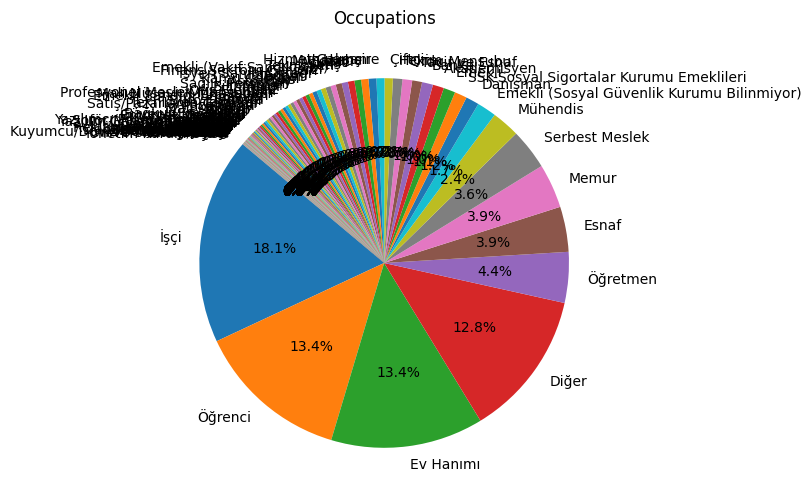

In [6]:
# 5-) customer occupation analysis

print(df_train["PP_MESLEK"])
# df_train["PP_MESLEK"].nunique() kayıtlı 114 key türü var
value_counts_meslek = df_train["PP_MESLEK"].value_counts().to_dict()

# Keys and values for pie chart
labels = value_counts_meslek.keys()
sizes = value_counts_meslek.values()
print(value_counts_meslek) # there are 114 different occupations

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
#plt.axis('equal')  # Daireyi daire olarak tutmak için
plt.title('Occupations')
plt.show()

Text(0.5, 1.0, 'Müşteri Cinsiyet Dağılımı')

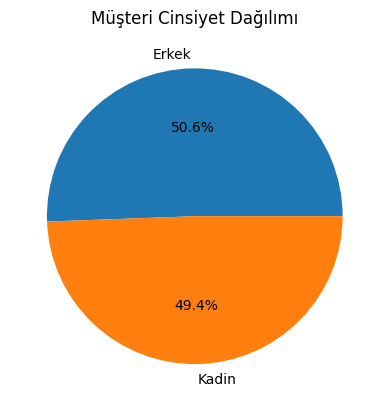

In [10]:
# 6-) Customer gender analysis

value_counts_cinsiyet = df_train["PP_CINSIYET"].value_counts()
erkek_sayisi = value_counts_cinsiyet.get(1, 0)
kadin_sayisi = value_counts_cinsiyet.get(2, 0)

# show it on pie chart
plt.pie([erkek_sayisi,kadin_sayisi], labels=["Erkek", "Kadin"], autopct='%1.1f%%')
plt.title("Müşteri Cinsiyet Dağılımı")
plt.show()

HAZIRAN    252193
MAYIS      246389
EKIM        93766
EYLUL       89170
TEMMUZ      86460
AGUSTOS     84741
Name: FLAG, dtype: int64


([<matplotlib.patches.Wedge at 0x1f7dbaf0790>,
 [Text(0.65838334913148, 0.8812101710638706, 'HAZIRAN'),
  Text(-1.0233234759596517, 0.40349605146749157, 'MAYIS'),
  Text(-0.7028832509025783, -0.8461413212936851, 'EKIM'),
  Text(-0.02112283845872649, -1.0997971747988111, 'EYLUL'),
  Text(0.6461497603309957, -0.8902193478150185, 'TEMMUZ'),
  Text(1.0468250783910362, -0.3378716549987596, 'AGUSTOS')],
 [Text(0.3591181904353527, 0.48066009330756565, '29.6%'),
  Text(-0.5581764414325372, 0.22008875534590447, '28.9%'),
  Text(-0.383390864128679, -0.4615316297965555, '11.0%'),
  Text(-0.011521548250214448, -0.5998893680720787, '10.5%'),
  Text(0.35244532381690674, -0.4855741897172828, '10.1%'),
  Text(0.5709954973042015, -0.18429362999932342, '9.9%')])

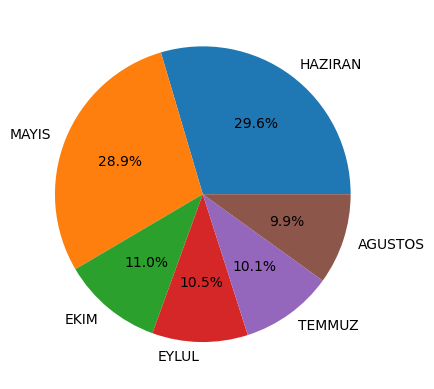

In [11]:
# 7-) Analysis of which month the data belongs to

print(df_train["FLAG"].value_counts()) # see the counts below

months = df_train["FLAG"].value_counts().to_dict().keys()
month_values = df_train["FLAG"].value_counts().to_dict().values()

# Create the pie chart
plt.pie(month_values, labels=months, autopct='%1.1f%%')
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 122]


Text(0, 0.5, 'Müşteri Sayısı')

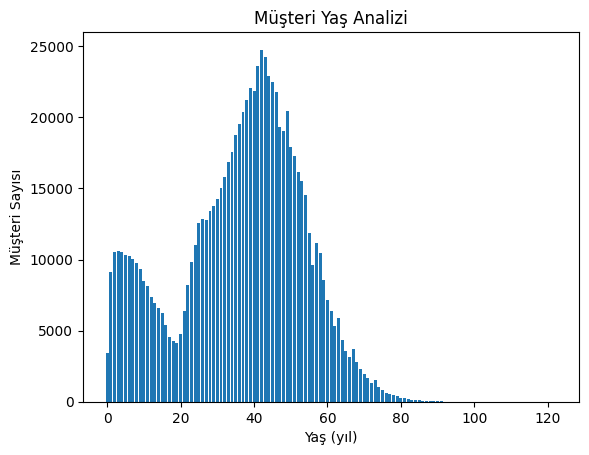

In [12]:
# 8-) Customer age anaylsis

# The age column holds the values of ages as months, we want to transform it as years
df_train["YAS_YIL"] = df_train["PP_YAS"]//12
keys_yas = df_train["YAS_YIL"].value_counts().to_dict().keys()
values_yas = df_train["YAS_YIL"].value_counts().to_dict().values()

# Sort the year values from less to more
new_list = [int(x) for x in list(keys_yas)]
new_list.sort()
print(new_list)

# Create the bar chart
plt.bar(keys_yas,values_yas)
plt.title("Müşteri Yaş Analizi")
plt.xlabel("Yaş (yıl)")
plt.ylabel("Müşteri Sayısı")
plt.show()

[106, 105, 102, 104, 103, 101]


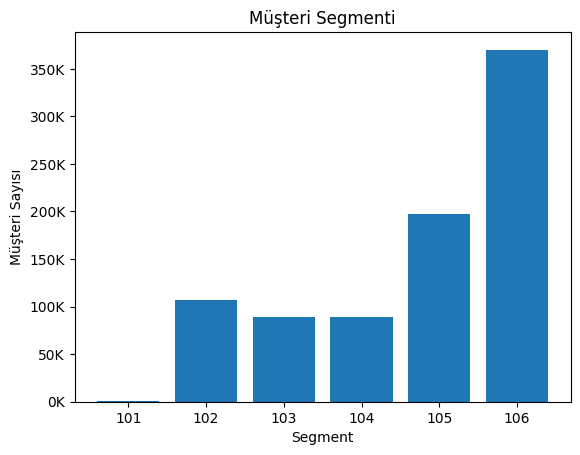

In [14]:
# 9-) Customer segment analysis

dict = df_train["PP_MUSTERI_SEGMENTI"].value_counts().to_dict()
print(list(dict.keys())) # there are 6 different segment (with type of int)
keys_segment = [name.__str__() for name in list(dict.keys())] # transform types to str

# Create the bar chart
plt.bar(list(dict.keys()),list(dict.values()))
plt.title("Müşteri Segmenti")
plt.xlabel("Segment")
plt.ylabel("Müşteri Sayısı")
formatter = FuncFormatter(millions) # edit yticks with the function in 4th block
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

tc:  848335   mavi: 2570   yabanci 1814


Text(0.5, 0, 'Uyruk')

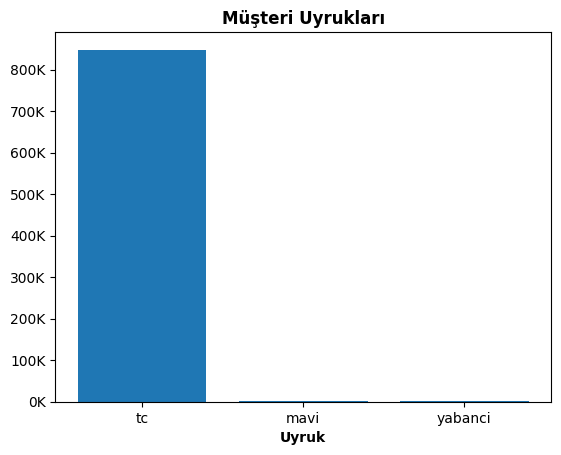

In [19]:
# 10-) Customer Nation Analysis

value_counts_uyruk = df_train["PP_UYRUK"].value_counts()
tc = value_counts_uyruk.get(1, 0)
mavi = value_counts_uyruk.get(2, 0)
yabanci = value_counts_uyruk.get(3, 0)
print("tc: ", tc, "  mavi:", mavi, "  yabanci", yabanci)

# Create the bar chart
plt.bar(["tc", "mavi", "yabanci"],[tc, mavi, yabanci])
formatter = FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Müşteri Uyrukları" ,fontweight="bold")
plt.xlabel("Uyruk", fontweight="bold")
plt.show()

Text(0, 0.5, 'Müşteri Sayısı')

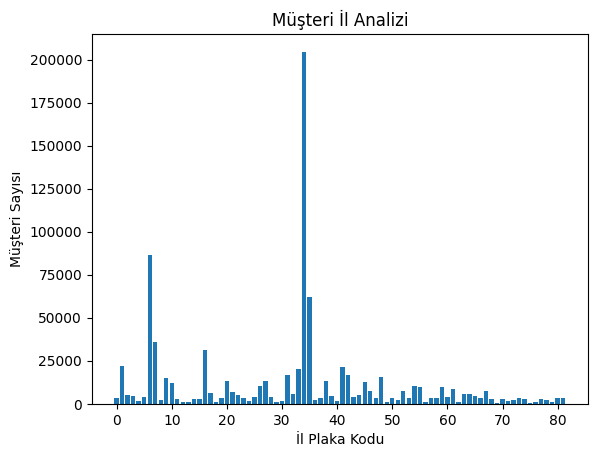

In [20]:
# 11-) Provincial analysis

plakalar = df_train["IL"].value_counts().to_dict().keys()
numbers_plakalar = df_train["IL"].value_counts().to_dict().values()

plt.bar(plakalar, numbers_plakalar)
plt.title("Müşteri İl Analizi",fontweight="bold" )
plt.xlabel("İl Plaka Kodu")
plt.ylabel("Müşteri Sayısı")
plt.show()

In [16]:
# 12-) labela gore siniflandirma

# Reorganise the soru_gelir column (it creates new column called SORU_GELIR_CVP_NEW)
reset_sorugelir(df_train)

# Rearrange the anapara column (it creates new column called ANAPARA_NEW)
reset_anapara(df_train)

# Group the labels in labeldata variable, it holds insurace names as keys, and the rows for each of its key as values
labeldata = {} # {str: pd.DataFrame}
for label, group in df_train.groupby('LABEL'):
    labeldata[label] = group

print(labeldata["HU06"]["BU01"]) # For example print one of the products

# Print all of its row counts
for label, group_df in labeldata.items():
    print("Label:", label, "- Satir sayisi:", group_df.shape[0])

0             0
1          7500
2             0
3             1
4          1500
          ...  
852714        0
852715    30000
852716     4000
852717     3000
852718     3000
Name: SORU_GELIR_CVP, Length: 852719, dtype: int32
1000000000
0          0
1          3
2          0
3          1
4          1
          ..
852714     0
852715    10
852716     2
852717     1
852718     1
Name: SORU_GELIR_CVP_NEW, Length: 852719, dtype: int64
319
1028      0
1041      0
1142      0
1495      0
1807      0
         ..
850616    0
851281    0
851799    0
851826    0
852556    0
Name: BU01, Length: 3178, dtype: int64
Label: HU06 - Satir sayisi: 3178
Label: HU07 - Satir sayisi: 3728
Label: HU11 - Satir sayisi: 439
Label: HU12 - Satir sayisi: 676
Label: HU14 - Satir sayisi: 10754
Label: HU15 - Satir sayisi: 415
Label: HU19 - Satir sayisi: 759
Label: UA - Satir sayisi: 832770


In [ ]:
# 13-) Analyse some features (age, gender etc.) of every product with the dict we created above (block 12)

# Function takes a pandas DataFrame as parameters. For example from labeldata variable, we can give the rows of HU19

# Function analyses and creates graphs for some feature of the products we gave
def label_analyse_to_graph(data: pd.DataFrame, name: str): # We need name in order to put it titles of charts

    # Create the required folders to save graphs
    if not os.path.exists("graphs"):
        os.makedirs("graphs")
        print("images klasörü olustu")
    
    if not os.path.exists("./graphs/{}".format(name)):
        os.makedirs("./graphs/{}".format(name))
        print("names klasoru olustu")
    
    # Get and print the number of columns and rows for the given product
    group_satir_sayisi = data.shape[0]
    group_kolon_sayisi = data.shape[1]
    print("Satir sayisi: ", group_satir_sayisi, ", Kolon sayisi: ", group_kolon_sayisi)


    # Gender analysis of the given product
    cinsiyet = {}
    for label, group in data.groupby("PP_CINSIYET"):
        cinsiyet[label] = group
    print(cinsiyet.keys())
    
    first_group = list(cinsiyet.values())[0]

    if 1 in first_group["PP_CINSIYET"].values:
        group_erkek_sayisi = len(first_group)
        if 2 in cinsiyet:
            group_kadin_sayisi = len(cinsiyet[2])
        else:
            group_kadin_sayisi = 0
    elif 2 in first_group["PP_CINSIYET"].values:
        group_kadin_sayisi = len(first_group)
        group_erkek_sayisi = 0
    else:
        print("ERROR: VERİDE BÜYÜK HATA VAR !!!!!!!!")
    
    # Pie chart for genders of the given product
    print("\nErkek sayisi: ",group_erkek_sayisi)
    print("Kadin sayisi: ",group_kadin_sayisi)
    if (group_erkek_sayisi + group_kadin_sayisi == group_satir_sayisi):
        print("Cinsiyet is ok!")
        plt.pie([group_erkek_sayisi, group_kadin_sayisi], labels=["Erkek", "Kadin"], autopct='%1.1f%%')
        plt.title("{}({}) Cinsiyet dagilimi".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_cinsiyet.png".format(name,name))
        plt.show()
    else:
        null_deger_sayisi = group_satir_sayisi - (group_erkek_sayisi + group_kadin_sayisi)
        print("Cinsiyette null var: ", null_deger_sayisi , " tane")
        plt.pie([group_erkek_sayisi, group_kadin_sayisi, null_deger_sayisi], labels=["Erkek", "Kadin", "Bilinmiyor"], autopct='%1.1f%%')
        plt.title("{}({}) Cinsiyet dagilimi".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_cinsiyet.png".format(name,name))
        plt.show()
    

    # Age analysis of the given product
    data["YAS_YIL"] = data["PP_YAS"]//12 # Transform the ages first
    yas_sayilari = data["YAS_YIL"].value_counts().to_dict() 
    print("\nyas: ",yas_sayilari)

    group_yas_sayilari_toplami = 0
    for yas_sayisi in yas_sayilari.values():
        group_yas_sayilari_toplami += yas_sayisi
    if (group_yas_sayilari_toplami == group_satir_sayisi):
        print("yas is ok")    
    else:
        print("Yas verisinde null var: ", group_satir_sayisi - group_yas_sayilari_toplami)
    
    yaslar = list(yas_sayilari.keys())
    yaslar.sort() # sort the ages
    sayilar = [yas_sayilari[yas] for yas in yaslar] # get the values of every ages, because it's been sorted
    
    # Create the bar chart
    plt.figure(figsize=(13,6))
    plt.bar(yaslar, sayilar)
    plt.xlabel("Yas")
    plt.ylabel("Kisi sayisi")
    plt.title("{}({}) Yas dagilimi".format(name,group_satir_sayisi), fontweight="bold")
    plt.savefig("./graphs/{}/{}_yas.png".format(name,name))
    plt.margins(0.01)
    plt.show()

    
    # Segment analysis of the given product
    group_segment = data["PP_MUSTERI_SEGMENTI"].value_counts().to_dict()
    print("\nsegment: ",group_segment)
    group_segment_sayisi = 0
    for segment in group_segment.values():
        group_segment_sayisi += segment
    if (group_segment_sayisi == group_satir_sayisi):
        print("Segment is ok")
    else:
        print("Segment verisinde null var: ", group_satir_sayisi - group_segment_sayisi)
    # Create the bar chart
    plt.bar(list(group_segment.keys()), list(group_segment.values()))  #bu sekil bar grafigi olusur
    plt.xlabel("Segment")
    plt.ylabel("Müşteri Sayisi")
    plt.title("{}({}) Segment dagilimi".format(name,group_satir_sayisi), fontweight="bold")
    plt.savefig("./graphs/{}/{}_segment.png".format(name,name))
    plt.show()

    
    # Nation analysis of the given product
    group_uyruk = data["PP_UYRUK"].value_counts()
    group_tc = group_uyruk.get(1, 0)
    group_mavi = group_uyruk.get(2, 0)
    group_yabanci = group_uyruk.get(3, 0)
    print("\ntc: ", group_tc, "  mavi:", group_mavi, "  yabanci", group_yabanci)
    group_uyruk_sayisi = group_tc + group_mavi + group_yabanci

    # Create the bar charts
    if (group_uyruk_sayisi == group_satir_sayisi):

        print("Uyruk is ok!")
        plt.bar(["tc", "mavi", "yabanci"],[group_tc, group_mavi, group_yabanci])
        plt.xlabel("Uyruk", fontweight='bold')
        plt.ylabel("Kisi sayisi", fontweight='bold')
        plt.title("{}({}) Uyruk dagilimi".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_uyruk.png".format(name,name))
        plt.show()

    else: 
        group_uyruk_bilinmeyen = group_satir_sayisi - group_uyruk_sayisi
        print("Uyrukta null var: ", group_uyruk_bilinmeyen)
        plt.bar(["tc", "mavi", "yabanci, bilinmiyor"],[group_tc, group_mavi, group_yabanci, group_uyruk_bilinmeyen])
        plt.xlabel("Uyruk", fontweight='bold')
        plt.ylabel("Kisi sayisi", fontweight='bold')
        plt.title("{}({}) Uyruk dagilimi".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_uyruk.png".format(name,name))
        plt.show()
    

    # Occupation analysis of the given product
    group_meslek = data["PP_MESLEK"].value_counts().to_dict()
    print("\n",group_meslek)
    group_meslek_isimleri = list(group_meslek.keys())
    print(group_meslek_isimleri)
    group_meslek_isimleri = [eleman.replace("Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)", "Emekli (SGK Bilinmiyor)") for eleman in group_meslek_isimleri]
    group_meslek_isimleri = [eleman.replace("SSK-Sosyal Sigortalar Kurumu Emeklileri", "SSK Emeklileri") for eleman in group_meslek_isimleri]
    group_meslek_sayilari = list(group_meslek.values())

    group_meslek_sayilari_toplami = 0
    for meslek_sayisi in group_meslek_sayilari:
        group_meslek_sayilari_toplami += meslek_sayisi
    if (group_meslek_sayilari_toplami == group_satir_sayisi):
        print("Meslek is ok")
    else:
        print("Meslekte null var: ", group_satir_sayisi - group_meslek_sayilari_toplami)

    # Create the bar charts
    fig, ax = plt.subplots(figsize=(17,10))
    plt.subplots_adjust(top=.96)
    plt.subplots_adjust(bottom=0.23)
    plt.bar(group_meslek_isimleri, group_meslek_sayilari, width=0.6)
    plt.xlabel("Meslekler", fontweight="bold")
    plt.ylabel("Kisi sayisi", fontweight="bold")
    plt.title("{}({}) Meslek dagilimi".format(name,group_satir_sayisi), fontweight="bold")
    plt.xticks(rotation=90, fontsize=9)
    plt.margins(0.01)
    plt.savefig("./graphs/{}/{}_meslek.png".format(name,name))
    plt.show()


    # SORU -> yatirim karakteri (Analysis of SORU_YATIRIM_KARAKTERI_CVP)
    group_yatirim_karakteri = data["SORU_YATIRIM_KARAKTERI_CVP"].value_counts().to_dict()
    print("\n",group_yatirim_karakteri)
    group_yatirim_karaktei_cevaplar = list(group_yatirim_karakteri.keys())
    group_yatirim_karaktei_cevap_sayilari = list(group_yatirim_karakteri.values())

    group_yatirim_karakteri_cevap_sayilari_toplami = 0
    for cevap_sayisi in group_yatirim_karaktei_cevap_sayilari:
        group_yatirim_karakteri_cevap_sayilari_toplami += cevap_sayisi
    print("Yatirim karakteri: Cevap verenlerin orani: %",100*group_yatirim_karakteri_cevap_sayilari_toplami/group_satir_sayisi)

    if (100*group_yatirim_karakteri_cevap_sayilari_toplami/group_satir_sayisi != 100):
        group_yatirim_karaktei_cevaplar.append("Bilinmeyen")
        group_yatirim_karaktei_cevap_sayilari.append(group_satir_sayisi-group_yatirim_karakteri_cevap_sayilari_toplami)
    
    # Create the bar charts
    plt.pie(group_yatirim_karaktei_cevap_sayilari, labels=group_yatirim_karaktei_cevaplar, autopct='%1.1f%%', pctdistance=0.75)
    plt.title("{}({}) Yatirim Karakteri Cevaplari".format(name,group_satir_sayisi), fontweight="bold")
    plt.savefig("./graphs/{}/{}_yatirim_karakteri.png".format(name,name))
    plt.show()
    
    
    # SORU -> medeni hal (Analyse of SORU_MEDENI_HAL_CVP)
    group_medeni_hal = data["SORU_MEDENI_HAL_CVP"].value_counts().to_dict()
    group_medeni_hal_cevaplar = list(group_medeni_hal.keys())
    group_medeni_hal_cevap_sayilari = list(group_medeni_hal.values())
    print("\n",group_medeni_hal)

    group_medeni_hal_cevap_sayilari_toplami = 0
    for cevap_sayisi in group_medeni_hal_cevap_sayilari:
        group_medeni_hal_cevap_sayilari_toplami += cevap_sayisi
    print("Medeni hal: Cevap verenlerin orani: ", 100 * group_medeni_hal_cevap_sayilari_toplami / group_satir_sayisi)

    # Create the bar charts
    if (100 * group_medeni_hal_cevap_sayilari_toplami / group_satir_sayisi == 100):
        print("tam")
        plt.pie(group_medeni_hal_cevap_sayilari, labels=group_medeni_hal_cevaplar, autopct='%1.1f%%')
        plt.title("{}({}) Medeni Hal Cevaplari".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_medeni_hal.png".format(name,name))
        plt.show()
    else : 
        #group_medeni_hal_cevap_sayilari.append(group_satir_sayisi - group_medeni_hal_cevap_sayilari_toplami)
        bilinmeyen_yuzde_medenihal = 100*(group_satir_sayisi - group_medeni_hal_cevap_sayilari_toplami) / group_satir_sayisi
        #group_medeni_hal_cevaplar.append("Bilinmeyen")
        plt.pie(group_medeni_hal_cevap_sayilari, labels=group_medeni_hal_cevaplar, autopct='%1.1f%%')
        plt.text(1.8, 1, 'bilinmeyen: %{:.1f}'.format(bilinmeyen_yuzde_medenihal), fontsize=10, ha='right', va='top', color="purple")
        plt.title("{}({}) Medeni Hal Cevaplari".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_medeni_hal.png".format(name,name))
        plt.show()
    

    # SORU -> egitim (Analysis of SORU_EGITIM_CVP)
    group_egitim = data["SORU_EGITIM_CVP"].value_counts().to_dict()
    print("\n",group_egitim)
    group_egitim_cevaplar = list(group_egitim.keys())
    group_egitim_cevap_sayilari = list(group_egitim.values())

    group_egitim_cevap_sayilari_toplami = 0
    for cevap_sayisi in group_egitim_cevap_sayilari:
        group_egitim_cevap_sayilari_toplami += cevap_sayisi
    print("Egitim: Cevap verenlerin orani: %", 100 * group_egitim_cevap_sayilari_toplami / group_satir_sayisi)

    # Create the bar charts
    if (100 * group_egitim_cevap_sayilari_toplami / group_satir_sayisi == 100):
        print("ok")
        fig, ax = plt.subplots(figsize=(11,6))
        plt.bar(group_egitim_cevaplar, group_egitim_cevap_sayilari)      
        plt.xlabel("Egitim Duzeyi", fontweight="bold", labelpad=0.3)
        plt.ylabel("Kisi sayisi", fontweight="bold", labelpad=0.3)
        plt.title("{}({}) Egitim Duzeyi Cevpalari".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_egitim.png".format(name,name))
        plt.show()
    else:
        group_egitim_cevaplar.append("Bilinmeyen")
        group_egitim_cevap_sayilari.append(group_satir_sayisi - group_egitim_cevap_sayilari_toplami)
        bilinmeyen_yuzde = 100* (group_satir_sayisi - group_egitim_cevap_sayilari_toplami) / group_satir_sayisi
        fig, ax = plt.subplots(figsize=(11,6))
        plt.bar(group_egitim_cevaplar, group_egitim_cevap_sayilari)

        index_egitim = len(group_egitim_cevaplar) - 1
        height_egitim = group_egitim_cevap_sayilari[index_egitim] + 16
        if (name=="HU11" or name == "HU15"):
            height_egitim = group_egitim_cevap_sayilari[index_egitim] + 5
        elif (name == "HU07" or name == "HU06" or name == "HU14" or name == "UA" or name == "HU19"):
            height_egitim = group_egitim_cevap_sayilari[index_egitim] * 1.1
            if (name == "HU07" or name=="HU06"):
                height_egitim += 40
            elif (name=="HU14"):
                height_egitim += 80
            elif (name == "HU19"):
                height_egitim += 20

        plt.text(index_egitim, height_egitim, "%{:.1f}".format(bilinmeyen_yuzde), ha='center', va='center', color="red")
        plt.xlabel("Egitim Duzeyi", fontweight="bold")
        plt.ylabel("Kisi sayisi", fontweight="bold")
        plt.title("{}({}) Egitim Duzeyi Cevpalari".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_egitim.png".format(name,name))
        plt.show()


    # SORU -> gelir (Analysis of SORU_GELIR_CVP)
    group_gelir = data["SORU_GELIR_CVP"].value_counts().to_dict()
    print("\n",group_gelir)
    group_gelir_cevaplar = list(group_gelir.keys())
    group_gelir_cevap_sayilari = list(group_gelir.values())

    group_gelir_cevap_sayilari_toplami = 0
    for cevap_sayisi in group_gelir_cevap_sayilari:
        group_gelir_cevap_sayilari_toplami += cevap_sayisi

    # Create a new dictionary to rearrange the values, because this column contains strings and floats etc.
    duzenlenmis_veri = {}
    # Convert the keys to integers and add the values to the new dictionary
    for anahtar, deger in group_gelir.items():
        if isinstance(anahtar, str) and "," in anahtar:
            degerler = anahtar.split(",")  # Split the values that contains comma with comma
            for deger_str in degerler:
                anahtar = int(float(deger_str))  # If it's float convert to int
                if anahtar in duzenlenmis_veri:
                    duzenlenmis_veri[anahtar] += deger
                else:
                    duzenlenmis_veri[anahtar] = deger
        else:
            anahtar = int(float(anahtar))
            if anahtar in duzenlenmis_veri:
                duzenlenmis_veri[anahtar] += deger
            else:
                duzenlenmis_veri[anahtar] = deger
    
    print("duzenlenmis: ", duzenlenmis_veri)
    sirali_veri = (sorted(duzenlenmis_veri.items()))
    min = 0
    if (name == "HU11" or name == "HU12" or name == "HU15" or name == "HU19"):
        print("az")
        sirali_veri = [tupple for tupple in sirali_veri if tupple[1] > 3] # burayi ayarla
        min = 3
    elif (name=="HU06" or name=="HU07" or name=="HU14"):
        print("orta")
        sirali_veri = [tupple for tupple in sirali_veri if tupple[1] > 30] # burayi ayarla
    elif (name=="UA"):
        print("cok")
        sirali_veri = [tupple for tupple in sirali_veri if tupple[1] > 330] # burayi ayarla
    sirali_cevap = []
    sirali_cevap_sayilari = []
    print("sirali veri: ",sirali_veri)
    for item in sirali_veri:
        sirali_cevap.append(str(item[0]))
        sirali_cevap_sayilari.append(int(item[1]))
    print("Gelir: Cevap verenlerin orani: %", 100 * group_gelir_cevap_sayilari_toplami / group_satir_sayisi)
    print("sirali cevap: ",sirali_cevap)
    print("sayilari: ",sirali_cevap_sayilari)

    # Create the bar chart of the given product
    if (group_gelir_cevap_sayilari_toplami == group_satir_sayisi): # that means there is no null
        print("gelir ok")
        fig, ax = plt.subplots(figsize=(16,10))
        plt.bar(sirali_cevap, sirali_cevap_sayilari)
        plt.xticks(rotation=90)
        plt.xlabel("Gelir duzeyi", fontweight="bold")
        plt.ylabel("Kisi sayisi", fontweight="bold")
        plt.title("{}({}) Gelir Duzeyi Cevaplari".format(name,group_satir_sayisi), fontweight="bold")
        plt.margins(0.01)
        plt.savefig("./graphs/{}/{}_gelir.png".format(name,name))
        plt.show()
    else:
        gelir_null_sayisi = (100 - (100 * group_gelir_cevap_sayilari_toplami / group_satir_sayisi))
        kalan = group_gelir_cevap_sayilari_toplami
        kalan_yuzde = 100 * group_gelir_cevap_sayilari_toplami / group_satir_sayisi
        fig, ax = plt.subplots(figsize=(16,10))
        plt.bar(sirali_cevap, sirali_cevap_sayilari)
        plt.xticks(rotation=90)
        plt.xlabel("Gelir duzeyi", fontweight="bold")
        plt.ylabel("Kisi sayisi", fontweight="bold")
        plt.title("{}({}) Gelir Duzeyi Cevaplari(>100)".format(name,group_satir_sayisi), fontweight="bold")
        plt.margins(0.02)
        index = len(sirali_cevap)
        print("sirali cevap: ",sirali_cevap)
        print("sayilari: ",sirali_cevap_sayilari)
        print("lazim: ", type(max(sirali_cevap)))
        print("lazim2: ", type(max(sirali_cevap_sayilari)))
        x = len(sirali_cevap)-5
        y = max(sirali_cevap_sayilari) - 3
        if (name == "UA"):
            y = max(sirali_cevap_sayilari) - 5000
            x = len(sirali_cevap)-20
        elif (name == "HU14"):
            y = max(sirali_cevap_sayilari) - 50
        elif (name == "HU06" or name == "HU07"):
            x = len(sirali_cevap) - 4
            y = max(sirali_cevap_sayilari) - 8
        plt.text(x, y, ("%{:.1f} bilinmiyor, kalan {:}(%{:.1f})".format(gelir_null_sayisi,kalan, kalan_yuzde)), ha='center', va='bottom', color="red", fontsize=12)

        highest_values = sorted(zip(sirali_cevap, sirali_cevap_sayilari), key=lambda item: item[1], reverse=True)[:3]
        for value in highest_values:
            plt.text(value[0], value[1], str(value[1]), ha='center', va='bottom', color="red", fontsize=13)
        max_values_indices = sorted(range(len(sirali_cevap_sayilari)), key=lambda i: sirali_cevap_sayilari[i])[-3:]
        for i in max_values_indices:
            plt.gca().get_xticklabels()[i].set_color('red')
            plt.gca().get_xticklabels()[i].set_fontsize(12)
            
        plt.ylim(top=max(sirali_cevap_sayilari) * 1.05)
        plt.savefig("./graphs/{}/{}_gelir.png".format(name,name))
        plt.show()


    # SORU -> cocuk sayisi (analysis of SORU_COCUK_SAYISI_CVP)
    group_cocuk_sayisi = data["SORU_COCUK_SAYISI_CVP"].value_counts().to_dict()
    print("\n", group_cocuk_sayisi)

    group_cocuk_sayisi_cevap_toplami = 0
    for cevap_sayisi in list(group_cocuk_sayisi.values()):
        group_cocuk_sayisi_cevap_toplami += cevap_sayisi
    print("Cocuk sayisi: Cevap verenlerin orani: %", int(100*group_cocuk_sayisi_cevap_toplami / group_satir_sayisi)) # int de olabilir

    group_cocuk_sayisi_bilinmeyen = group_satir_sayisi - group_cocuk_sayisi_cevap_toplami

    sirali_veri_cocuk = {(int(key)): value for key, value in sorted(group_cocuk_sayisi.items())}
    filtered_keys = filter(lambda k: sirali_veri_cocuk[k] > 3, sirali_veri_cocuk)
    sirali_veri_cocuk = {str(key): sirali_veri_cocuk[key] for key in filtered_keys}
    print(list(sirali_veri_cocuk.values()))

    # Create the bar charts of the given product
    if (int(100*group_cocuk_sayisi_cevap_toplami / group_satir_sayisi) == 100):

        plt.figure(figsize=(10,6))
        plt.bar(list(sirali_veri_cocuk.keys()), list(sirali_veri_cocuk.values()))
        
        plt.title("{}({}) Cocuk Sayisi Cevaplari".format(name,group_satir_sayisi), fontweight="bold")
        plt.xlabel("Cocuk sayisi", fontweight="bold")
        plt.ylabel("Kisi miktari", fontweight="bold")
        plt.savefig("./graphs/{}/{}_cocuk_sayisi.png".format(name,name))
        plt.show()
    else:
        sirali_veri_cocuk["NA"] = group_cocuk_sayisi_bilinmeyen
        plt.figure(figsize=(10,6))
        plt.bar(list(sirali_veri_cocuk.keys()), list(sirali_veri_cocuk.values()))
        
        son_bar_yuzde = 100 * list(sirali_veri_cocuk.values())[-1] / group_satir_sayisi
        plt.text(len(sirali_veri_cocuk) - 1, list(sirali_veri_cocuk.values())[-1], f'{son_bar_yuzde:.2f}%', ha='center', va='bottom', color="red")
        ilk_bar_yuzde = 100 * list(sirali_veri_cocuk.values())[0] / group_satir_sayisi
        plt.text(0, list(sirali_veri_cocuk.values())[0], f'{ilk_bar_yuzde:.2f}%', ha='center', va='bottom', color="red")
        plt.title("{}({}) Cocuk Sayisi Cevaplari".format(name,group_satir_sayisi), fontweight="bold")
        plt.xlabel("Cocuk sayisi", fontweight="bold")
        plt.ylabel("Kisi miktari", fontweight="bold")
        plt.savefig("./graphs/{}/{}_cocuk_sayisi.png".format(name,name))
        plt.show()


    # Analysis of ANAPARA_NEW column
    print(data.columns)
    print(data["ANAPARA_NEW"].value_counts().to_dict())
    anapara_duzenli = data["ANAPARA_NEW"].value_counts().to_dict()
    keys_to_remove = [key for key, value in anapara_duzenli.items() if value < 4]
    for key in keys_to_remove:
        del anapara_duzenli[key]
    print(list(anapara_duzenli.keys()).__len__())
    plt.bar(anapara_duzenli.keys(), anapara_duzenli.values())
    plt.title("Anapara_new grafigi")
    plt.show()


# Loop through every product and call the function 
for label, other in labeldata.items():
    print("label : ", label)
    label_analyse_to_graph(labeldata["{}".format(label)], label)

In [ ]:
# 14-) Insurances that are already owned by the customer for every product

def hu_to_beshu_graph(name: str):
    
    # Create the folders to save graphs
    if not os.path.exists("graphs"):
        os.makedirs("graphs")
        print("images klasörü olustu")

    if not os.path.exists("./graphs/{}".format("labels")):
        os.makedirs("./graphs/{}".format("labels"))
        print("names klasoru olustu")
    dosya_yolu = os.path.join(os.getcwd(), "graphs", "labels", "{}_sahip_olunana.png".format(name))

    # Fill the bu_dict with the sum of the BES insurances already owned
    bu_dict = {}
    for i in range(1,25):
        if (i<10):
            bu_dict["BU0"+str(i)] = labeldata[name]["BU0"+str(i)][(labeldata[name]["BU0"+str(i)] == 1)].shape[0]
        else:
            bu_dict["BU"+str(i)] = labeldata[name]["BU"+str(i)][(labeldata[name]["BU"+str(i)] == 1)].shape[0]
    print(bu_dict)
 
    # Fill the bu_dict with the sum of the HU insurances already owned
    for i in range(1,20):
        if (i == 8 or i == 9):
            print("salla: ",i)
        else:
            if (i<10):
                bu_dict["HU0"+str(i)] = labeldata[name]["HU0"+str(i)][(labeldata[name]["HU0"+str(i)] == 1)].shape[0]
            else:
                bu_dict["HU"+str(i)] = labeldata[name]["HU"+str(i)][(labeldata[name]["HU"+str(i)] == 1)].shape[0]
   
    # Crate the bar chart of the given product
    blue_color = ['blue'] * 24
    red_color = ['red'] * 17
    colors = blue_color + red_color
    print(sum(list(bu_dict.values())))
    plt.figure(figsize=(14,7.6))
    plt.bar(bu_dict.keys(), bu_dict.values())
    for i, tick in enumerate(plt.gca().get_xticklabels()):
        if i < 24:
            tick.set_color('blue')
        else:
            tick.set_color('red')

    plt.xticks(rotation=90)
    plt.title("{}({}) alanlarin sahip oldugu sigortalar".format(name,labeldata[name].shape[0]), fontweight="bold", pad=14)
    plt.xlabel("Sahip olunan urunler", fontweight="bold", labelpad=10.9)
    plt.ylabel("Kisi sayisi", fontweight="bold", labelpad=7.6)
    
    max_value_police = max(list(bu_dict.values()))
    max_index_police = list(bu_dict.values()).index(max_value_police)
    percentage_police = (max_value_police / sum(list(bu_dict.values()))) * 100
    plt.text(max_index_police, max_value_police * 1.01, "%{:.1f}".format(percentage_police), ha='center', color=(0.44,0.078,0.13), fontsize=11)
    plt.savefig(dosya_yolu)
    plt.show()
        

hu_to_beshu_graph("HU06")
hu_to_beshu_graph("HU07")
hu_to_beshu_graph("HU11")
hu_to_beshu_graph("HU12")
hu_to_beshu_graph("HU14")
hu_to_beshu_graph("HU15")
hu_to_beshu_graph("HU19")
hu_to_beshu_graph("UA")

In [ ]:
# 15-) The years passed on the purchase of the product

# Create the folders to put graphs
if not os.path.exists("graphs"):
    os.makedirs("graphs")
    print("images klasörü olustu")
    
if not os.path.exists("./graphs/Policenin_uzerinden_gecen_yil"):
    os.makedirs("./graphs/Policenin_uzerinden_gecen_yil")
    print("Policenin_uzerinden_gecen_yil klasoru olustu")

# The values are given as months, we will convert them to years
df_train["AKTIF_ILK_POLICE_RG_YIL"] = df_train["AKTIF_ILK_POLICE_RG"]//12

print(df_train["AKTIF_ILK_POLICE_RG_YIL"].value_counts().to_dict())
police_dict = df_train["AKTIF_ILK_POLICE_RG_YIL"].value_counts().to_dict() # Assign the counts to a dictionary

# Create the bar graphs
plt.bar(police_dict.keys(), police_dict.values())
plt.title("Policelerin uzerinden gecen yillar({})".format(sum(police_dict.values())))

max_value_police = max(list(police_dict.values()))
max_index_police = list(police_dict.values()).index(max_value_police)
percentage_police = (max_value_police / sum(list(police_dict.values()))) * 100
plt.text(max_index_police, max_value_police * 1.01, "%{:.1f}".format(percentage_police), ha='center', color=(0.44,0.078,0.13))

plt.savefig("./graphs/Policenin_uzerinden_gecen_yil/genel_grafik.png")
plt.show()

for i in range(20):

    rows = df_train.loc[df_train["AKTIF_ILK_POLICE_RG_YIL"] == i]
    print("{}: ".format(i),rows["LABEL"].value_counts().to_dict())
    row_dict = rows["LABEL"].value_counts().to_dict()
    UA_year = row_dict["UA"]
    toplam_year = sum(row_dict.values())
    UA_yuzde = 100 * UA_year / toplam_year
    del row_dict["UA"]
    print(UA_year)
    print(toplam_year)
    print(UA_yuzde)
    print("new row: ", row_dict)
    
    max_value = max(list(row_dict.values()))
    max_index = list(row_dict.values()).index(max_value)
    percentage = (max_value / sum(list(row_dict.values()))) * 100
    plt.text(max_index, max_value * 1.01, "%{:.1f}".format(percentage), ha='center', color="green")
    y_loc = max(list(row_dict.values())) + 3.5
    x_loc = len(list(row_dict.keys()))-5.9
    if 8 < i < 16 or i > 16:
        y_loc = max(list(row_dict.values()))
        if i == 15 or i == 17:
            x_loc = len(list(row_dict.keys())) - 5.0
        elif i == 19: 
            x_loc = len(list(row_dict.keys())) - 2.5
    elif i == 16:
        y_loc = max(list(row_dict.values())) - 1
    #elif i > 16:
        #y_loc = max(list(row_dict.values())) - 1
    
    plt.text(x_loc, y_loc, "UA orani: %{:.1f}, kalan %{:.1f} ({}) ise yukaridaki gibi".format(UA_yuzde,100 - (UA_yuzde), toplam_year - UA_year),fontsize=9, color='red')

    plt.bar(row_dict.keys(), row_dict.values())
    plt.title("Policenin uzerinden {} yil gecenler({})".format(i,toplam_year))
    plt.savefig("./graphs/Policenin_uzerinden_gecen_yil/{}_yil.png".format(i))
    plt.show()
    

In [ ]:
# 16-) ML - KNN

# These are the classes to predict and the metrics on kaggle platform
# HU06 | 0.0385
# HU07 | 0.0328
# HU11 | 0.2791
# HU12 | 0.1812
# HU14 | 0.0113
# HU15 | 0.2952
# HU19 | 0.1614
# UA | 0.0001

# read again 
df_train = pd.read_csv("./train.csv", low_memory=False)

#  numerization of train_set

# Create a new column for age in years, and rearrange anapara and gelir columns with the functions in block 4
df_train["YAS_YIL"] = df_train["PP_YAS"] // 12
reset_anapara(df_train)
reset_sorugelir(df_train)

# List of columns to encode
columns_tonumerate = ['PP_MESLEK', 'SORU_MEDENI_HAL_CVP']

# Iterate through each column for encoding
for column in columns_tonumerate:
    encoder = LabelEncoder()
    encode = encoder.fit_transform(df_train[column])
    df_train[column + '_NEW'] = encode  # Add encoded values to DataFrame
    df_train.drop(columns=[column], inplace=True)  # Drop the original column

classes = ['HU06', 'HU07', 'HU11', 'HU12', 'HU14', 'HU15', 'HU19', 'UA']
weights = np.array([0.0385, 0.0328, 0.2791, 0.1812, 0.0113, 0.2952, 0.1614, 0.0001])
class_weights = {'HU06': 0.0385, 'HU07': 0.0328, 'HU11': 0.2791 ,'HU12': 0.1812, 'HU14': 0.0113, 'HU15': 0.2952, 'HU19': 0.1614, 'UA': 0.0001} 

X = df_train[[df_train.columns[-1],df_train.columns[-2],'PP_CINSIYET','YAS_YIL','PP_MUSTERI_SEGMENTI','SORU_GELIR_CVP_NEW','ANAPARA_NEW']].values
y = df_train['LABEL'].values

# string degerlerin de int'e donusturulmesi gerekiyor !!!
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=53)
print("train set  ",X_train.shape,y_train.shape)
print("test set  ",X_test.shape,y_test.shape)

k=17 #k degerimizi belirliyoruz
neigh = KNeighborsClassifier(n_neighbors=k, weights='distance')
# neigh = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski', metric_params=class_weights)
neigh.fit(X_train, y_train)

# tahmin yapiyoruz
y_hat = neigh.predict(X_test)

test_accuracy = neigh.score(X_test, y_test)
# print("Test accuracy with class weights:", test_accuracy)

print("egitim verisi dogrulugu ",metrics.accuracy_score(y_train,neigh.predict(X_train)))
print("test verisi dogrulugu ",metrics.accuracy_score(y_test,y_hat))

# gercek test dosyasinda deneme ---------------------------------------------------------

# test.csv numerizasyon
df_test = pd.read_csv("test.csv", low_memory=False)

# Create a new column for age in years
df_test["YAS_YIL"] = df_test["PP_YAS"] // 12
reset_anapara(df_train)
reset_sorugelir(df_train)

# List of columns to encode
columns_tonumerate = ['PP_MESLEK', 'SORU_MEDENI_HAL_CVP']

# Iterate through each column for encoding
for column in columns_tonumerate:
    encoder = LabelEncoder()
    encode = encoder.fit_transform(df_test[column])
    df_test[column + '_NEW'] = encode  # Add encoded values to DataFrame
    df_test.drop(columns=[column], inplace=True)  # Drop the original column

# imputing nan values
imputer = SimpleImputer(strategy='mean')
X_realtest_imputed = imputer.fit_transform(df_test[['PP_MESLEK_NEW','SORU_MEDENI_HAL_CVP_NEW','PP_CINSIYET','YAS_YIL','PP_MUSTERI_SEGMENTI','SORU_GELIR_CVP_NEW','ANAPARA_NEW']])

# Standardize the features
X_realtest_imputed = StandardScaler().fit(X_realtest_imputed).transform(X_realtest_imputed.astype(float))

# test tahmin 

# Load the trained model and predict labels for the test data
y_hat = neigh.predict(X_realtest_imputed)
submission = pd.read_csv("sample_submission.csv", low_memory=False)
submission.iloc[:, 1] = y_hat
# submission.to_csv("knnsubmission4.csv", index=False)

In [4]:
# 17-) ML - DECISION TREE & RANDOM FOREST
# Execute block 0 and 4 before executing this block

# import required functions who are just needed in here (we've tried these methods and couldn't get good results)
from sklearn.model_selection import GridSearchCV, validation_curve, StratifiedShuffleSplit
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from numpy import mean
from numpy import std

# Give class weights
#class_weights = {'HU06': 0.0385 , 'HU07': 0.0328 , 'HU11': 0.2791 ,'HU12': 0.1812, 'HU14': 0.0113, 'HU15': 0.2952, 'HU19': 0.1614, 'UA': 0.0001} 
#class_weight_list = [0.0385, 0.0328, 0.2791, 0.1812, 0.0113, 0.2952, 0.1614, 0.0001]
new_class_weights = {'HU06': 33.54, 'HU07': 28.59, 'HU11': 242.80, 'HU12': 157.68, 'HU14': 9.91, 'HU15': 256.84 , 'HU19': 140.43, 'UA': 0.104}

# Read files to be sure
trainset = pd.read_csv("train.csv", low_memory=False)
testset = pd.read_csv("test.csv", low_memory=False)

# rearrange some columns
reset_anapara(trainset)
reset_sorugelir(trainset)

reset_anapara(testset)
reset_sorugelir(testset)

# Create new features
trainset["BES_TOPLAM"] = (trainset.iloc[:, list(range(55, 79))].sum(axis=1))
testset["BES_TOPLAM"] = (trainset.iloc[:, list(range(55, 79))].sum(axis=1))
trainset["HU_TOPLAM"] = (trainset.iloc[:, list(range(79, 95))].sum(axis=1))
testset["HU_TOPLAM"] = (testset.iloc[:, list(range(79, 95))].sum(axis=1))
trainset["YAS_YIL"] = trainset["PP_YAS"] // 12
testset["YAS_YIL"] = testset["PP_YAS"] // 12
trainset["GETIRI_ANAPARA_ORANI"] = trainset["GETIRI"] / trainset["ANAPARA"]
testset["GETIRI_ANAPARA_ORANI"] = testset["GETIRI"] / testset["ANAPARA"]

# numarate some of required columns
columns_tonumerate = ['PP_MESLEK', 'SORU_MEDENI_HAL_CVP',"SORU_YATIRIM_KARAKTERI_CVP", "GETIRI_ANAPARA_ORANI", "SORU_EGITIM_CVP"]
for column in columns_tonumerate:
    encoder = LabelEncoder()
    encode = encoder.fit_transform(trainset[column])
    trainset[column + '_NEW'] = encode  # Add encoded values to DataFrame
    trainset.drop(columns=[column], inplace=True)  # Drop the original column
for column in columns_tonumerate:
    encoder = LabelEncoder()
    encode = encoder.fit_transform(testset[column])
    testset[column + '_NEW'] = encode  # Add encoded values to DataFrame
    testset.drop(columns=[column], inplace=True)  # Drop the original column

# imputer = SimpleImputer(strategy='mean')
# trainset = imputer.fit_transform(trainset[['PP_MESLEK_NEW','SORU_MEDENI_HAL_CVP_NEW','PP_CINSIYET','YAS_YIL','PP_MUSTERI_SEGMENTI']])
imputer = SimpleImputer(strategy='mean')

testset_imputed = imputer.fit_transform(testset[['PP_MESLEK_NEW',"HU_TOPLAM",'PP_CINSIYET','YAS_YIL','PP_MUSTERI_SEGMENTI','SORU_GELIR_CVP_NEW','GETIRI_ANAPARA_ORANI_NEW',"SORU_MEDENI_HAL_CVP_NEW", "SORU_EGITIM_CVP_NEW","BES_TOPLAM"]])
print(trainset.columns)

columns = [trainset.columns[-4], trainset.columns[-5], trainset.columns[-6], 'PP_CINSIYET', 'PP_MUSTERI_SEGMENTI', 'SORU_GELIR_CVP_NEW', 'GETIRI_ANAPARA_ORANI_NEW', "SORU_EGITIM_CVP_NEW", "HU_TOPLAM", "BES_TOPLAM"]
print(columns)

X1 = trainset[columns].values
y1 = trainset['LABEL'].values
print("SMOTE")
# X2 = testset[[testset.columns[-1],testset.columns[-2],'PP_CINSIYET','YAS_YIL','PP_MUSTERI_SEGMENTI']].values
# y2 = testset['LABEL'].values

X1 = preprocessing.StandardScaler().fit(X1).transform(X1.astype(float))
testset_imputed = StandardScaler().fit(testset_imputed).transform(testset_imputed.astype(float))

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2, random_state=3, stratify=y1, shuffle=True)

#classifier1 = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=53,class_weight=class_weights)
#classifier1.fit(X1_train,y1_train)
""" this is for model tuning
rf_params = {"max_depth": [5],
             "max_features": [2],
             "n_estimators": [1500],
             "min_samples_split": [2],
             "min_samples_leaf" : 3,
             "class_weight": [class_weights]} 
"""
print("RandomForestClassifier") # Random forest model
#rf_cv_model = GridSearchCV(rf1,rf_params,cv=10,n_jobs=-1,verbose=12)
#rf_cv_model.fit(X1_train, y1_train)

rf1 = RandomForestClassifier(n_estimators=250,max_features= 3, max_depth = 5, min_samples_leaf = 2, min_samples_split = 2, random_state=42, class_weight=new_class_weights)
rf1.fit(X1_train, y1_train)

#y1pred = classifier1.predict(X1_test)
#best_rf_model = rf_cv_model.best_estimator_
rf1pred = rf1.predict(X1_test)

# print the feature_importances
feature_importances = rf1.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
print("Sorted Feature Importances:")
for index in sorted_indices:
    print(f"{columns[index]}: {feature_importances[index]}")


#print(confusion_matrix(y1_test,y1pred))
#print(classification_report(y1_test,y1pred))

print(accuracy_score(y1_test, rf1pred))
print(confusion_matrix(y1_test, rf1pred))
print(classification_report(y1_test, rf1pred, zero_division=1))

319


C:\Users\ökkeş\AppData\Roaming\Python\Python311\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


0             0
1          7500
2             0
3             1
4          1500
          ...  
852714        0
852715    30000
852716     4000
852717     3000
852718     3000
Name: SORU_GELIR_CVP, Length: 852719, dtype: int32
1000000000
0          0
1          3
2          0
3          1
4          1
          ..
852714     0
852715    10
852716     2
852717     1
852718     1
Name: SORU_GELIR_CVP_NEW, Length: 852719, dtype: int64
319
0         3000
1         2800
2         2000
3            0
4            0
          ... 
195626       0
195627    6000
195628       0
195629       0
195630       0
Name: SORU_GELIR_CVP, Length: 195631, dtype: int32
1500000000
0         1
1         1
2         1
3         0
4         0
         ..
195626    0
195627    2
195628    0
195629    0
195630    0
Name: SORU_GELIR_CVP_NEW, Length: 195631, dtype: int64
Index(['MUSTERI_ID', 'LABEL', 'FLAG', 'PP_CINSIYET', 'PP_YAS',
       'PP_MUSTERI_SEGMENTI', 'PP_UYRUK', 'IL', 'SORU_YATIRIM_KARAKTERI_RG',
      

In [10]:
# 18-) best parameters after model tuning
# print("En iyi parametreler: ", str(rf_cv_model.best_params_)) 

En iyi parametreler:  {'max_depth': 2, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [91]:
# 19-) write the predictions on sample_submission.csv file to submit on kaggle

submission = pd.read_csv("sample_submission.csv", low_memory=False)

#y1pred_test = classifier1.predict(X_realtest_imputed)
#submission.iloc[:, 1] = y1pred_test
#submission.to_csv("dt_submission3.csv", index=False)


rf1pred_test = rf1.predict(testset_imputed)
submission.iloc[:, 1] = rf1pred_test
submission.to_csv("rf_submission_last_but_not_at_least.csv", index=False)